# **Importing Libraries**

In [1013]:
# Kütüphanelerin Import Edilmesi

# Numerik hesaplamalar yapabilmek için gerekli kütüphanenin import edilmesi.
import numpy as np

# Ver manipülasyonu ve analizi için gerekli kütüphanenin import edilmesi.
import pandas as pd

# Veri setleri ve grafik çizdirmek için gerekli kütüphanenin import edilmesi.
import seaborn as sns

# Grafik çizdirmek için gerekli kütüphanenin import edilmesi.
import matplotlib.pyplot as plt

# Eksik değerler için kütüphanenin önce indirilip sonra import edilmesi.
#!pip install missingno
import missingno as msno

# Zaman kütüphanesinin import edilmesi.
from datetime import date

# Çok değişkenli aykırı değerleri yakalamak için kütüphanenin import edilmesi.
from sklearn.neighbors import LocalOutlierFactor

# Veri setini Holdout yöntemi ile eğitim ve test verisi olarak ikiye bölünmesi için gerekli kütüphanenin import edilmesi.
from sklearn.model_selection import train_test_split

# Model sonuçlarının değerlendirilmesi için kütüphanenin import edilmesi.
from sklearn.metrics import accuracy_score

# Ölçeklendirme için kütüphanelerin import edilmesi.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler


# Sınıflandırma algoritmaları için kütüphanelerin import edilmesi.

# Lojistik Regresyon algoritması için kütüphanenin import edilmesi
from sklearn.linear_model import LogisticRegression

# KNN algortiması için kütüphanin import edilmesi.
from sklearn.neighbors import KNeighborsClassifier

# Random Forest algortması kütüphnesinin import edilmesi.
from sklearn.ensemble import RandomForestClassifier

# Destek Vektör Makinesi algoritması kütüphanesinin import edilmesi.
from sklearn.svm import SVC

# LightGBM Algoritması kütüphanesinin import edilmesi
from sklearn.ensemble import GradientBoostingClassifier

# XGBoost Algoritması kütüphanesinin import edilmesi
from xgboost import XGBClassifier

# Decision Tree Classifier Algoritması kütüphanesinin import edilmesi.
from sklearn.tree import DecisionTreeClassifier

# Çıktı görüntülerinin daha iyi olması için gerekli ayarların yapılması
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%3.f" % x)
pd.options.display.float_format = '{:,.3f}'.format
pd.set_option("display.width", 5000)

# **1. Step: Exploratory Data Analysis (EDA)**

## **Genel Resim**

* Bu aşamada veri setini ve değişkenlerini, değişkenlerin veri tiplerini, eksek değer var mı yok mu şeklindeki sorulara cevap arayacağız.
* Aynı zamanda değişkenlerin grafikleri çizdireceğiz.


Veri setimizi yükleyelim.

In [1014]:
data = pd.read_csv("/content/drive/MyDrive/Sıfırdan Başlayanlar İçin Veri Bilimi - miuul/Veri Setleri/titanic_data.csv")

In [1015]:
df = data.copy()

* Proje süresince rahat çalışabilmemiz için birkaç işlem yapalım.
1. Tüm değişkenleri tek bir yazı boyutuna getireim.
2. PassengerId değişkeni bizim için hiçbir anlam taşımadığı için (çünkü index bilgisinden hiç bir farkı yok, sadece 1'den başlamış) o değişkeni silelim.

In [1016]:
df.columns = [col.upper() for col in df.columns]

In [1017]:
df.drop("PASSENGERID", inplace=True, axis=1)

Titanic veri setinin hikayesine bakalım:

* Bu veri seti bir yolculuğu bu yolculuk esnasında meydana gelen kaza sonrasında yolcuların hayatta kalıp kalmama
durumlarını ifade eden bir veri setidir. 
* Titanic gemisindeki yolcuların istatistiklerini tutan bir veri setidir. 
Veri setinde toplam 891 yolcu vardır.
* Bir yolculuğa ait veri setidir. Veri setinde çeşitli dğeişkenler var ve bu gemiye binen kişilerin hayatta kalma ya da kalmama durumları survived değişkeni ile ifade edilmiş.

Değişkenler: 
* survived: Hayatta kaldı mı ? (0 : Hayır , 1: Evet)
* pclass: Yolculuk sınıfı ifade eder (1 (En iyi) , 2 (Orta) , 3 (En kötü))
* sex: Yolcunun cinsiyeti (Male , Female)
* age: Yolcunun yaşı (0.42 (1 yaşından küçük bebekler) , 80)
* sibsp: Yolcunun gemide bulunan kardeş sayısı (0–8)    
* parch: Yolcunun gemide bulunan akraba sayısı (0–6) - Uzak akraba
* fare: Yolcunun bilet için ödediği tutar (0–512.3292)
* embarked: Yolcunun gemiye bindiği kapı (S (En iyisi), C (Orta), Q (En Kötüsü))
* embark_town: Yolcunun gemiye bindiği iskelenin bulunduğu şehir. - Bindiği limanı ifade ediyor.
* cabin: Uçakta seyahat eden yolcu ve personellere verilen kabin numaralarıdır.
* ticket: Bilet numarası.
* Name: Yolcuların isim, meslek ve cinsiyet bilgisi.

ilk beş gözlemine bakalım.

In [1018]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


Son beş gözleme bakalım.

In [1019]:
df.tail()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
886,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


Gözlem ve değişken sayılarına bakalım.

In [1020]:
df.shape

(891, 11)

891 gözlemden, 1 değişkenden oluşmakta.
* 11 değişken özelllik değişkeni, 1 değişken (survived) hedef/target değişkenidir.

Değişkenler hakkında bilgi almak istersek.

In [1021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SURVIVED  891 non-null    int64  
 1   PCLASS    891 non-null    int64  
 2   NAME      891 non-null    object 
 3   SEX       891 non-null    object 
 4   AGE       714 non-null    float64
 5   SIBSP     891 non-null    int64  
 6   PARCH     891 non-null    int64  
 7   TICKET    891 non-null    object 
 8   FARE      891 non-null    float64
 9   CABIN     204 non-null    object 
 10  EMBARKED  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


* Bu çıktı bize ne anlatıyor?
* Veri setinin bir veri çerçevesinde görüntülendiğini, 891 tane gözlem olduğunu, 11 tane değişken olduğunu, Age, Cabin ve Embarked değişkenlerinde eksik veriler olduğunu, 6 tane numerik değşken, 5 tane de kategorik değişken olduğunu anlatmakta.

Değişken isimlerine erişmek istersek.

In [1022]:
df.columns

Index(['SURVIVED', 'PCLASS', 'NAME', 'SEX', 'AGE', 'SIBSP', 'PARCH', 'TICKET', 'FARE', 'CABIN', 'EMBARKED'], dtype='object')

İndex bilgisine erişmek istersek.

In [1023]:
df.index

RangeIndex(start=0, stop=891, step=1)

Sayısal değişkenlerin betimsel istatistiklerine erişmek istersek.

In [1024]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SURVIVED,891.000,0.384,0.487,0.000,0.000,0.000,1.000,1.000
PCLASS,891.000,2.309,0.836,1.000,2.000,3.000,3.000,3.000
AGE,714.000,29.699,14.526,0.420,20.125,28.000,38.000,80.000
SIBSP,891.000,0.523,1.103,0.000,0.000,0.000,1.000,8.000
PARCH,891.000,0.382,0.806,0.000,0.000,0.000,0.000,6.000
FARE,891.000,32.204,49.693,0.000,7.910,14.454,31.000,512.329


* Bu çıktı bize veri setindeki sayısal değişkenlerin herbirinde kaç tane değer olduğunu, ortalama, standart sapma, minimum, maximum değerlerini ve çeyrekliklerdeki değerleri göstermektedir.
* Bu çıktı ile bir değişkenin hangi iki değer aralığında değiştiğini ortalamadan ne kadar saptığı vb. bilgilere erişebiliyoruz.

Veri setinde eksik değer var mı yok mu sorusunu soralım.
* True ya da False şeklinde bize çıktı verecektir.
* True: Evet veri setinde en az bir tane eksik değer var,
* False: Veri setinde hiç eksik değer yok.

In [1025]:
df.isnull().values.any()

True

* Her bir değişkende toplam eksik değerleri görmek istersek.

In [1026]:
df.isnull().sum()

SURVIVED      0
PCLASS        0
NAME          0
SEX           0
AGE         177
SIBSP         0
PARCH         0
TICKET        0
FARE          0
CABIN       687
EMBARKED      2
dtype: int64

Age değişkeninde 177 adet, Cabin değişkeninde 687 adet ve Embarked değişkeninde ise 2 adet eksik değer bulunmakta.

## **Kategorik Değişkenlerin Analizi - (Analysis of Categorical Variables)**

* Öncelikle veri setindeki değişkenleri veri tiplerine göre ayıracak şekilde bir fonksiyon yazalım.
* Bu fonksiyon bize veri setimizdeki kategorik tipteki, sayısal tipteki, kategorik olup kardinalitesi yüksek tipteki ve son olarak sayısal gibi gözüküp kategorik olan değişkenleri birbirinden ayırıp bize liste formunda getirsin.
* Açıklamalar fonksiyonun içindeki docstrin'de yer almaktadır.

In [1027]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
  """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
        değişken isimleri alınmak istenen dataframe'dir.
    cat_th: int, float
        numerik fakat kategorik olan değişkenler için sınıf eşik değeri
    car_th: int, float
        kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    -------
    cat_cols: list
        Kategorik değişken listesi
    num_cols: list
        Numerik değişken listesi
    cat_but_car: list
        Kategorik görünümlü kardinal değişken listesi

    Notes
    ------
    cat_cols + num_cols + cat_but_car = toplam değişken sayısı
    num_but_cat cat_cols'un içerisinde.
  """
  # Kategorik Değişkenler: cat_cols & num_but_car

  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "bool", "object"]] 
  # cat_cols: Veri tipi category, object ve bool olan değişkenleri seçer.

  num_but_cat = [col for col in df.columns if (df[col].nunique() < 10) and (df[col].dtypes in ["int64", "float64"])]
  # num_but_cat: Eşsiz değer sayısı 10'dan az ve int float olan değişkenleri seçer. 
  # Bu değişkenler sayısal gibi gözüküp kategorik değişkenlerdir.(survived, pclass değişkenleri gibi.)

  cat_but_car = [col for col in df.columns if (df[col].nunique() > 20) and str(df[col].dtypes) in ["category", "object"]]
  # cat_but_car: Eşsiz değeri 20'den büyük olup veri tipide category, object olan değişlenleri seçer.
  # Bu değişkenler kullanacak olduğumuz modeller için anlamlı bir sonuç çıkarmamaktadır.
  # Ölçüm niteliği taşımamaktadır.
  # Kardinalitesi yüksek olan değişkenlerdir. (name, ticket ve kabin değişkenleri.)

  cat_cols += num_but_cat
  # cat_but_car değişkeni de numerik görünümlü kategorik değişken olduğu için bu değişkeni de cat_cols listesine ekleyelim.

  cat_cols = [col for col in cat_cols if col not in cat_but_car]
  # Kardinalitesi yüksek olan değişkenleri cat_cols listesinden çıkardık.

  # Numerik Değişkenler: num_cols
  num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
  #Veri tipi int ve float olan değişkenleri seçer.

  num_cols = [col for col in num_cols if col not in cat_cols]
  #Sayısal tipteki değişkenlerin içinde kategorik değişkenlerde var, onları almayıp onların dışındakileri al demek istedik.

  # Raporlama Bölümü:
  print(f"Obsertavions - (Gözlem Sayısı): {dataframe.shape[0]}")
  print(f"Variables (Değişken Sayısı): {dataframe.shape[1]}")
  print(f"cat_cols (Kategorik Değişkenler): {len(cat_cols)}")
  print(f"num_cols (Sayısal Değişkenler): {len(num_cols)}")
  print(f"cat_but_car (Kardinalitesi Yüksek Değişkenler): {len(cat_but_car)}")
  print(f"num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [1028]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 891
Variables (Değişken Sayısı): 11
cat_cols (Kategorik Değişkenler): 6
num_cols (Sayısal Değişkenler): 2
cat_but_car (Kardinalitesi Yüksek Değişkenler): 3
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 4


In [1029]:
cat_cols

['SEX', 'EMBARKED', 'SURVIVED', 'PCLASS', 'SIBSP', 'PARCH']

In [1030]:
num_cols

['AGE', 'FARE']

In [1031]:
cat_but_car

['NAME', 'TICKET', 'CABIN']

Her bir kategorik değişkenin sınıflarının frekanslarını ve o sınıfların oranlarını alabileceğimiz ve aynı zamanda sütun grafiklerini çizdirebileceğimiz bir fonksiyon yazalım..

In [1032]:
def cat_summary(dataframe, col_name, plot = False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("#########################################")
  if plot:
    sns.countplot(x = dataframe[col_name], data = dataframe);
    plt.show(block=True)

        SEX  Ratio
male    577 64.759
female  314 35.241
#########################################


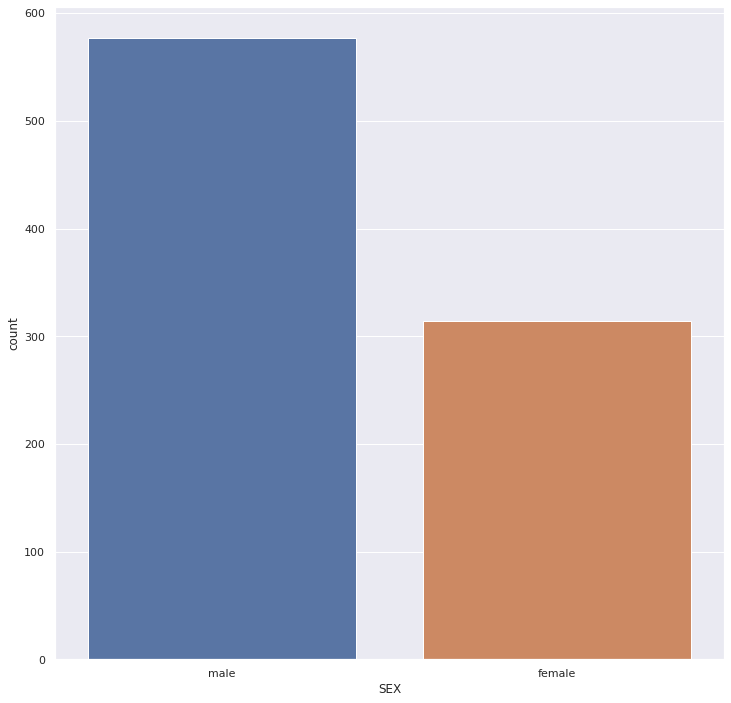

   EMBARKED  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642
#########################################


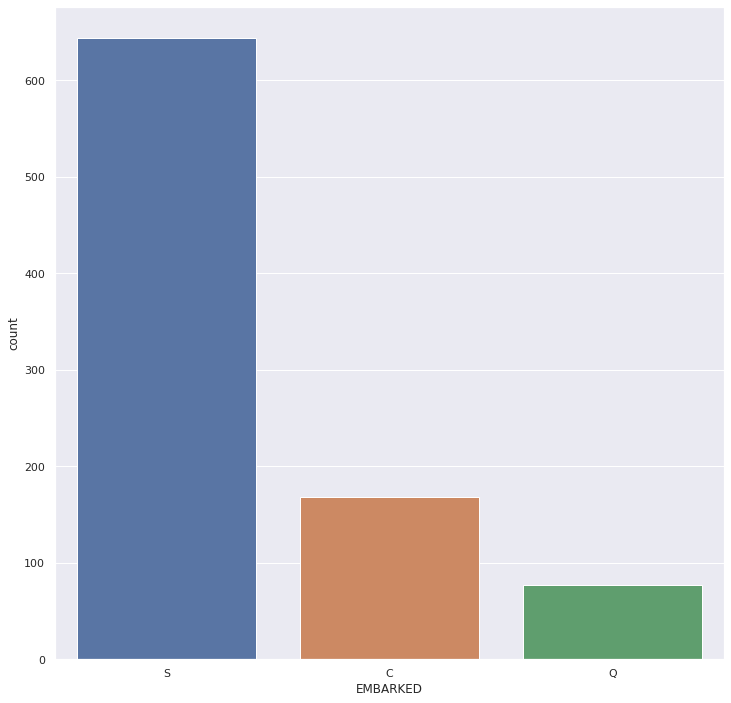

   SURVIVED  Ratio
0       549 61.616
1       342 38.384
#########################################


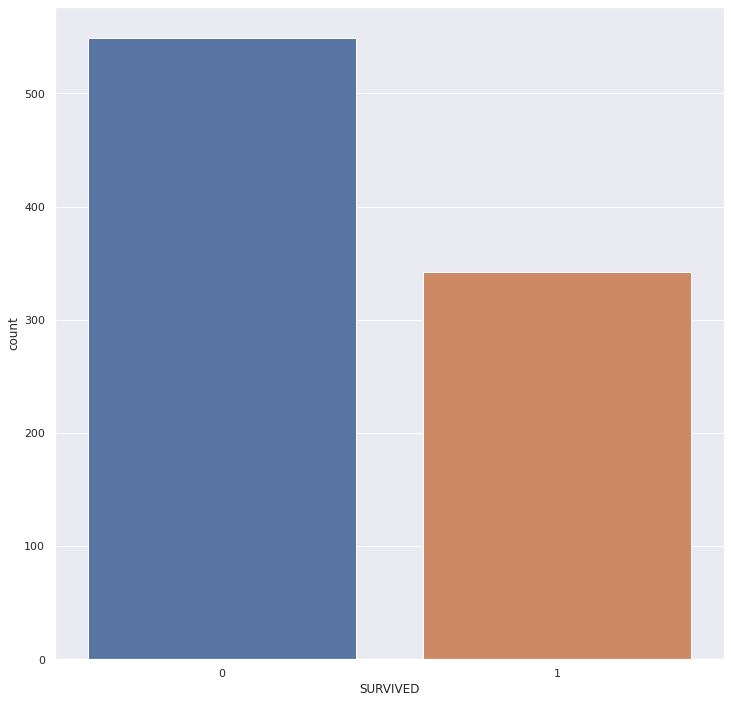

   PCLASS  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
#########################################


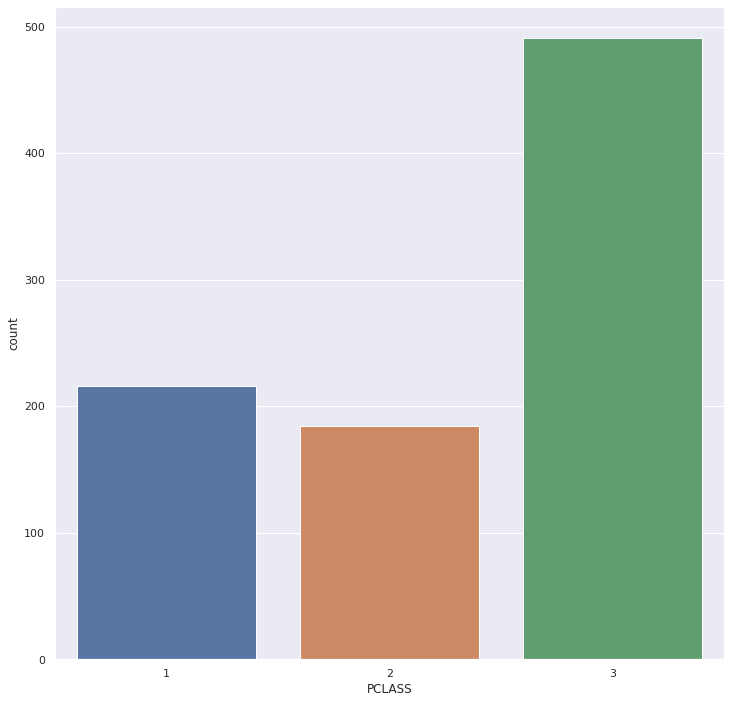

   SIBSP  Ratio
0    608 68.238
1    209 23.457
2     28  3.143
4     18  2.020
3     16  1.796
8      7  0.786
5      5  0.561
#########################################


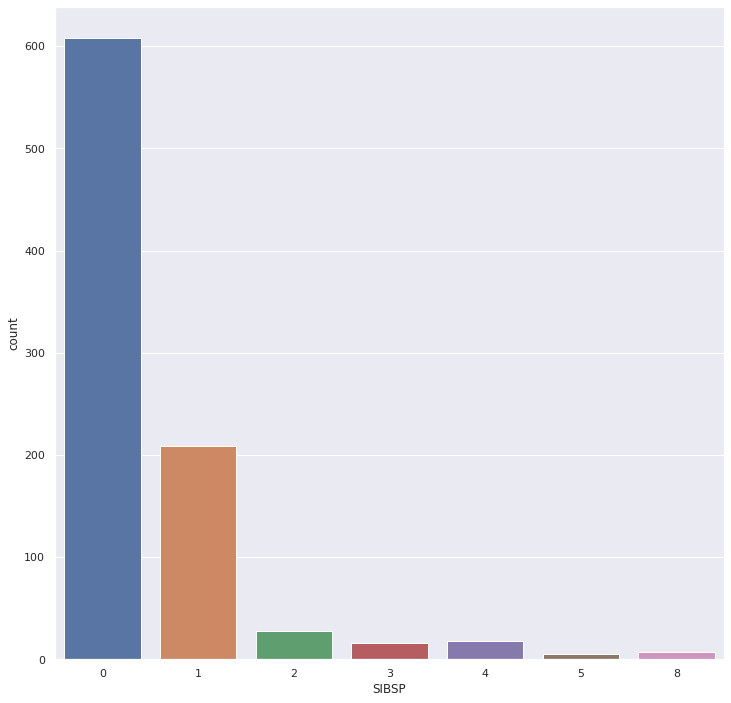

   PARCH  Ratio
0    678 76.094
1    118 13.244
2     80  8.979
5      5  0.561
3      5  0.561
4      4  0.449
6      1  0.112
#########################################


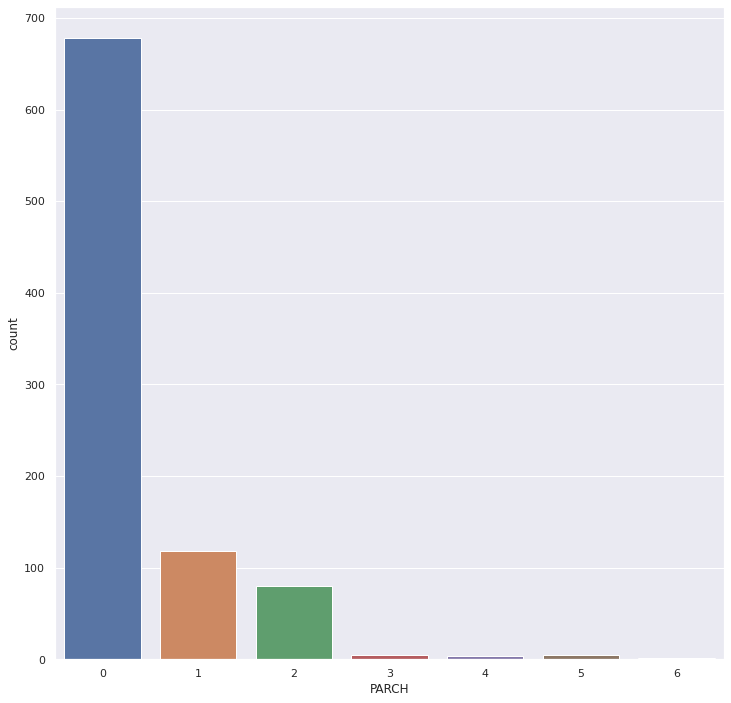

In [1033]:
for col in cat_cols:
  cat_summary(df, col, plot=True)

* SEX: Gemide 577 erkek, 314 bulunmakta.
* EMBARKED: 644 kişi S limanından, 168 kişi C limanından, 77 kişi Q limanından binmiş.  
* PCLASS: 216 kişi 1. sınıf, 184 kişi 2. sınıf, 491 kişi ise 3. sınıf kalitede yolculuk etmişler.
* SURVIVED: Gemiye binenlerin yaklaşık %38'i hayatta kalmış.

Tüm kategorik değişkenlerin eşsiz değerlerine erişmek istersek.

In [1034]:
for col in cat_cols:
  print(col, df[col].unique())

SEX ['male' 'female']
EMBARKED ['S' 'C' 'Q' nan]
SURVIVED [0 1]
PCLASS [3 1 2]
SIBSP [1 0 3 4 2 5 8]
PARCH [0 1 2 5 3 4 6]


* Tüm kategorik değişkenlerin eşsiz değerlerinin sayılarına erişmek istersek.
* Kategorik değişkenlerin eşsiz sınıf değerlerine bakarak doğru değişkenleri seçip seçmediğimizi sağlamasını yaparak kontrol edelim.

In [1035]:
for col in cat_cols:
  print(col, df[col].nunique())

SEX 2
EMBARKED 3
SURVIVED 2
PCLASS 3
SIBSP 7
PARCH 7


Sadece kategorik değişkenleri veri setinden çekmek istersek.

In [1036]:
df[cat_cols].head()

,SEX,EMBARKED,SURVIVED,PCLASS,SIBSP,PARCH
0,male,S,0,3,1,0
1,female,C,1,1,1,0
2,female,S,1,3,0,0
3,female,S,1,1,1,0
4,male,S,0,3,0,0


In [1037]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


## **Sayısal Değişken Analizi (Analysis of Numerical Variables)**

* Sayısal tipteki değişkenleri analiz etmeye çalışalım.
* Elimizdeki sayısal tipteki dğeişkenler için grafik özelliği olan analiz fonksiyonu yazalım.

In [1038]:
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T, end="\n\n")

  if plt:
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)

count   714.000
mean     29.699
std      14.526
min       0.420
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: AGE, dtype: float64



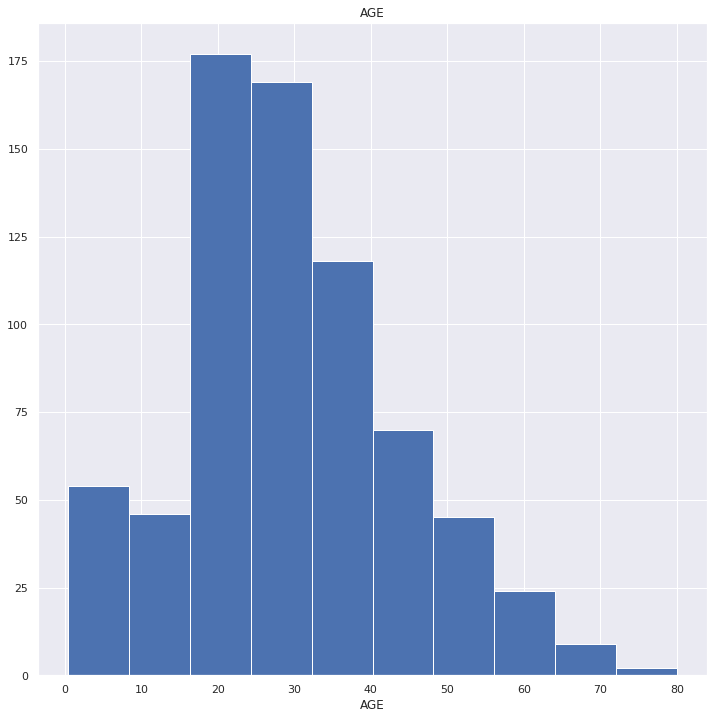

count   891.000
mean     32.204
std      49.693
min       0.000
5%        7.225
10%       7.550
20%       7.854
30%       8.050
40%      10.500
50%      14.454
60%      21.679
70%      27.000
80%      39.688
90%      77.958
95%     112.079
99%     249.006
max     512.329
Name: FARE, dtype: float64



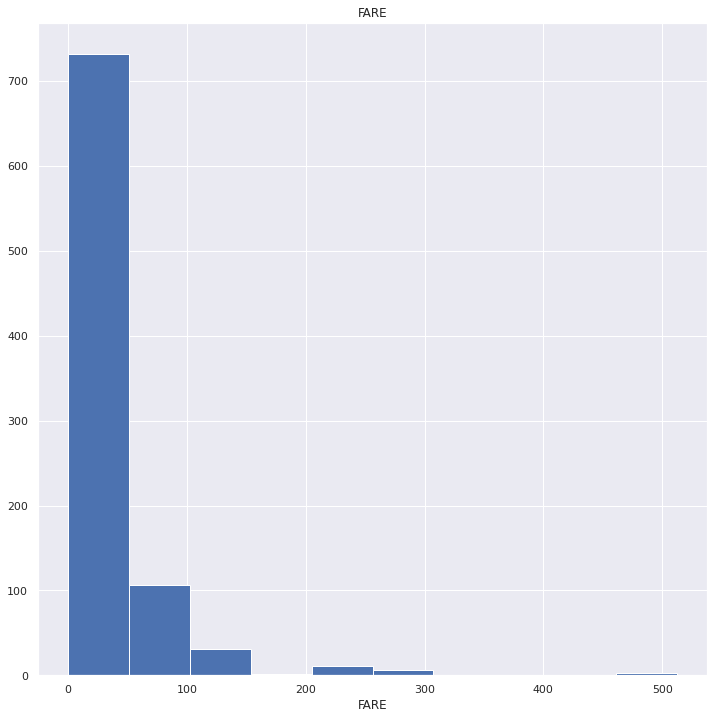

In [1039]:
for col in num_cols:
  num_summary(df, col, plot=True)

## **Hedef Değişken Analizi (Analysis of Target Variables)**

Elimizdeki hedef değişkenini kategorik değişkenler ve sayısal değişkenler açısından analiz edelim.

SURVIVED değişkeni sınıf frekanslarına oranlarına ve sütun grafiğine bakalım.

   SURVIVED  Ratio
0       549 61.616
1       342 38.384
#########################################


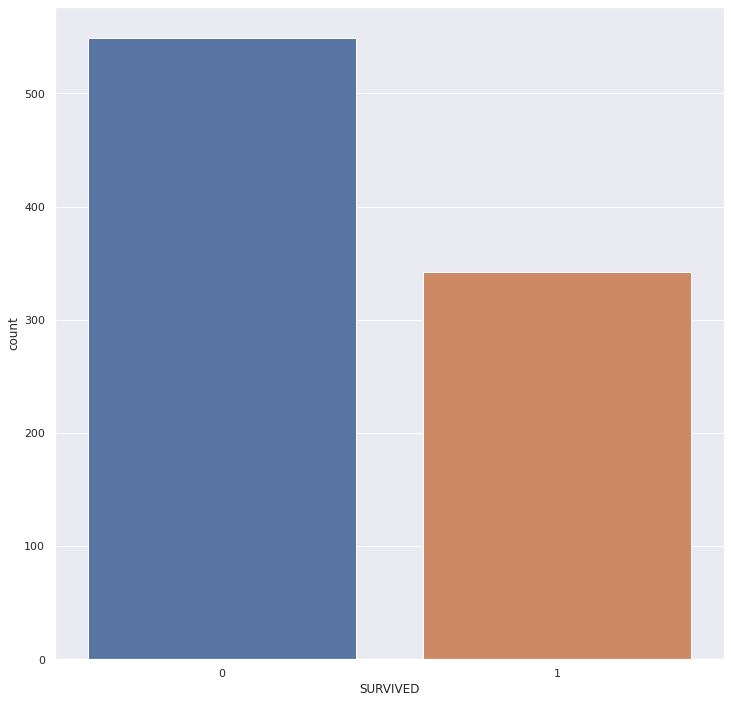

In [1040]:
cat_summary(df, "SURVIVED", plot=True)

Hayatta kalma durumunu ne etkiliyor, biz bunu bulmaya çalışıyor olacağız?

## **Hedef Değişkenin Kategorik Değişkenler İle Analizi**

Hedef değişkenini kategorik değişkenler kırılımında ortalamasını alabileceğimiz bir fonksiyon yazalım.

In [1041]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [1042]:
for col in cat_cols:
  target_summary_with_cat(df, "SURVIVED", col)

        TARGET_MEAN
SEX                
female        0.742
male          0.189


          TARGET_MEAN
EMBARKED             
C               0.554
Q               0.390
S               0.337


          TARGET_MEAN
SURVIVED             
0               0.000
1               1.000


        TARGET_MEAN
PCLASS             
1             0.630
2             0.473
3             0.242


       TARGET_MEAN
SIBSP             
0            0.345
1            0.536
2            0.464
3            0.250
4            0.167
5            0.000
8            0.000


       TARGET_MEAN
PARCH             
0            0.344
1            0.551
2            0.500
3            0.600
4            0.000
5            0.200
6            0.000




* ilk gruplamaya baktığımızda kadınların %74'ü erkeklerin ise %18'i hayatta klamış.
* İkinci gruplamada ise C lokasyonundan binenlerin %55'i hayatta kalmış.
* 1.sınıf yolculuk yapanların %63'ü hayatta kalmış.

## **Hedef Değişkenin Sayısal Değişkenler İle Analizi**

In [1043]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(pd.DataFrame({numerical_col + "_MEAN": dataframe.groupby(target)[numerical_col].mean()}), end="\n\n\n")

In [1044]:
for col in num_cols:
  target_summary_with_num(df, "SURVIVED", col)

          AGE_MEAN
SURVIVED          
0           30.626
1           28.344


          FARE_MEAN
SURVIVED           
0            22.118
1            48.395




* 1. gruplamaya baktığımızda hayatta kalanların yaş ortalaması 28.
* 2. gruplama da ise hayatta kalanların verdikleri ortalama ücret 48 parabirimi.

## **Korelasyon Analizi**

Korelasyon analizi için bir fonksiyon yazalım.

In [1045]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr() # korelasyon değrerlini oluşturduk.
  cor_matrix = corr.abs() # sonra bunun mutlak değerini aldık.
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool)) # Köşegen elemanlarına göre düzeltme işlemi yaptık.
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)] # Belirli bir korelasyonun üzerinde olanları seç dedik. Ve liste içine atadık.
  
  if plot:
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.set(rc = {"figure.figsize" : (12,12)})
    sns.heatmap(corr, cmap = "RdBu")
    plt.show()

  return drop_list

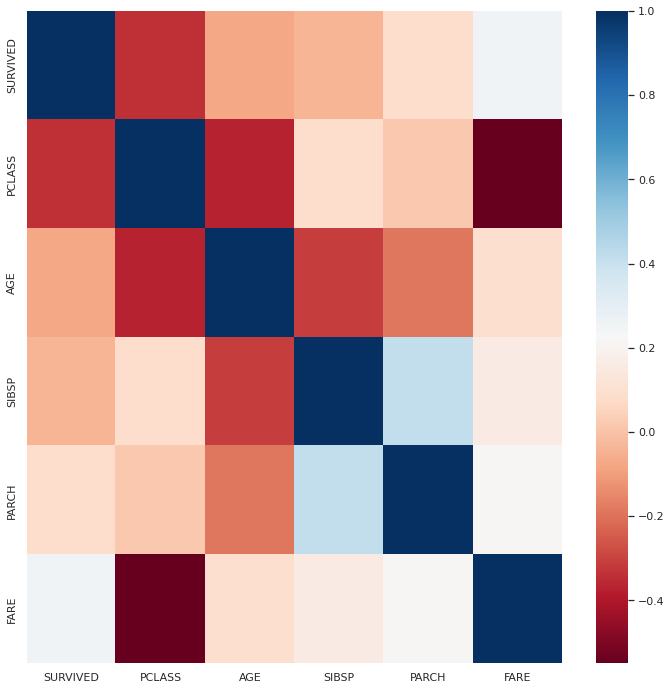

In [1046]:
drop_list = high_correlated_cols(df, plot=True)

In [1047]:
drop_list

[]

* Görüldüğü üzere korelasyon değeri yüksek bir değişkenimiz yok.
* Korelasyonu yüksek bir dğeişkenimiz olmadığı için silmemizi gerektirecek bir değişkenimiz de yok.

# **2. Step: Feature Engineering & Data Pre-Processing**

## **Değişken Mühendisliği (Feature Engineering)**

Bu aşamada değişkenlerden yeni değişkenler türetmeye çalışacağız.
* Normalde bizim için bir bilgi taşımayacak nitelikteki bir değişkenden yeni değişkenler (özellikler) türeteceğiz.
* Yeni ürettiğimiz değişkenler hedef değişkenini yani hayatta kalıp kalmama durumunu etkileyen nitelikte olabilir.

In [1048]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


**1. CABIN değişkenine odaklanalım.**

In [1049]:
df["CABIN"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: CABIN, dtype: object

* Eksik değerlerine bakalım.

In [1050]:
df["CABIN"].isnull().sum()

687

Görüldüğü üzere değişkenin değerlerinin yarısından çoğu eksik.
* Cabin değişkeni gemiye binen kişilere (yolcu, personel) eğer o kişinin kalacağı bir kabin varsa ona kabin numarası verilen bir değişkendir.
* Bu değişken hem bu açıdan hem de içindeki veri açısından bizim için bir anlam taşımıyor.
* O yüzden biz bu değişkeni kabin numarası olanlar ve olmayanlar olarak düşünelim ve cabin numarası olanlara 1, olmayanlara ise 0 yazdıralım.

In [1051]:
df["NEW_CABIN_FLAG"] = df["CABIN"].notnull().astype("int")

In [1052]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0


* Bizim için bilgi taşımayan değişkenden artık bilgi taşıyan bir değişken türetmiş olabiliriz.

In [1053]:
df.groupby("NEW_CABIN_FLAG").agg({"SURVIVED":"mean"})

,SURVIVED
NEW_CABIN_FLAG,
0,0.300
1,0.667


* Cabın numarası olanların %66'sı hayatta kalmış.
* Bizim için bilgi taşımayan bir değişken artık önemli bir değişken haline geldi.

**2. SIBSP	PARCH	değişkenine odaklanalım.**

* sibsp: Yolcunun gemide bulunan kardeş sayısı (0–8)
* parch: Yolcunun gemide bulunan akraba sayısı (0–6) - Uzak akraba
* Bu iki değişkenin toplamı sıfırdan büyük olması ilgili gözlemdeki kişinin gemide yalnız olmadığını gösterir.

In [1054]:
df.loc[((df["SIBSP"] + df["PARCH"]) > 0), "NEW_IS_ALONE"] = "NO"   #Bu kişi yalnız değildir.
df.loc[((df["SIBSP"] + df["PARCH"]) == 0), "NEW_IS_ALONE"] = "YES" #Bu kişi yalnızdır.

In [1055]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES


Oluşturduğumuz bu yeni değişkeninde hedef değişken kırılımında anlamlı olup olmadığını inceleyelim.

In [1056]:
df.groupby("NEW_IS_ALONE").agg({"SURVIVED":"mean"})

,SURVIVED
NEW_IS_ALONE,
NO,0.506
YES,0.304


* Gemi de yalnız olmayan her iki kişiden biri hayatta kalmış.
* Yalnız olanların ise sadece %30'u hayatta kalmış.
* Oluşturduğumuz bu yeni değişken de önemli bir değişken haline geldi.

**3. NAME	değişkenine odaklanalım.**

Name değişkenindeki string ifadeleri saydıralım.

In [1057]:
df["NEW_NAME_COUNT"] = df["NAME"].str.len()

In [1058]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24


Name değişkenindeki isimleri saydıralım.

In [1059]:
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

In [1060]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23,4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51,7
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44,7
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24,4


* İsim değişkenine odaklandığımız da gemide doktorlar da var.
* Acaba bir kişinin doktor olması hayatta kalma durumunu etkilemiş midir?
* Bunu incelemek için bu bilgiyi de değişkene dönüştürelim.

In [1061]:
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [1062]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23,4,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51,7,0
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22,3,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44,7,0
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24,4,0


* Bu şekilde göremedik.
* Dr başlığına sahip olanlar filtreleyim.

In [1063]:
df[df["NEW_NAME_DR"] == 1]

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
130,0,3,"Drazenoic, Mr. Jozef",male,33.000,0,0,349241,7.896,NaN,C,0,YES,20,3,1
245,0,1,"Minahan, Dr. William Edward",male,44.000,2,0,19928,90.000,C78,Q,1,NO,27,4,1
317,0,2,"Moraweck, Dr. Ernest",male,54.000,0,0,29011,14.000,NaN,S,0,YES,20,3,1
398,0,2,"Pain, Dr. Alfred",male,23.000,0,0,244278,10.500,NaN,S,0,YES,16,3,1
416,1,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.000,1,1,28220,32.500,NaN,S,0,NO,47,7,1
632,1,1,"Stahelin-Maeglin, Dr. Max",male,32.000,0,0,13214,30.500,B50,C,1,YES,25,3,1
660,1,1,"Frauenthal, Dr. Henry William",male,50.000,2,0,PC 17611,133.650,NaN,S,0,NO,29,4,1
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000,0,1,PC 17755,512.329,B51 B53 B55,C,1,NO,34,5,1
766,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.600,NaN,C,0,YES,25,4,1
796,1,1,"Leader, Dr. Alice (Farnham)",female,49.000,0,0,17465,25.929,D17,S,1,YES,27,4,1


Doktorların sayısına bakalım.

In [1064]:
len(df[df["NEW_NAME_DR"] == 1])

10

* Gemi de on kişi doktor.
* Bu değişken bizim için anlamlı bir değişken mi bunu inceleyelim.

In [1065]:
df.groupby("NEW_NAME_DR").agg({"SURVIVED":["mean", "count"]})

SURVIVED      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

Görüldüğü üzere mesleği doktor olan iki kişiden biri hayatta kalmış.

Name değişkenindeki kişilerin tüm title bilgisini çekelim.

In [1066]:
df["NEW_TITLE"] = df["NAME"].str.extract(" ([A-Za-z]+)\.", expand=False)

In [1067]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23,4,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51,7,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22,3,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44,7,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24,4,0,Mr


Yeni oluşturduğumuz değişken bizimiçin ne kadar  önemli bunu inceleyelim.


In [1068]:
df.groupby(["NEW_TITLE"]).agg({"SURVIVED":"mean", "AGE": ["count", "mean"]})

SURVIVED   AGE       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

Bizim için bilgi taşımayan Name değişkeninden birçok anlamlı değişken çıkardık.

**4. AGE ve PCLASS değiişkenlerine odaklanalım.**

In [1069]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

Yaşı küçük olup birinci sınıf yolculuk yapanlar, yaşı büyük olup üçüncü sınıf yolculuk yapan kişileri tespit etmek için bu iki değişkeni çarptık.

**5. SIBSP ve PARCH değiişkenlerine odaklanalım.**

* Aile boyutlarını (her ailede kaç kişi olduğunu) incelemek amaçlı yeni bir değişken oluşturalım.
* Kardeş sayısı, akraba sayısı ve kendisi.

In [1070]:
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

In [1071]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_AGE_PCLASS,NEW_FAMILY_SIZE
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23,4,0,Mr,66.000,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51,7,0,Mrs,38.000,2
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22,3,0,Miss,78.000,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44,7,0,Mrs,35.000,2
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24,4,0,Mr,105.000,1


**6. AGE  değiişkenine odaklanalım.**

In [1072]:
df.loc[(df["AGE"] < 18), "NEW_AGE_CAT"] = "young"
df.loc[((df["AGE"] > 18) & (df["AGE"] < 56)), "NEW_AGE_CAT"] = "mature"
df.loc[(df["AGE"] >= 56), "NEW_AGE_CAT"] = "senior"

**7. AGE ve SEX değiişkenlerine odaklanalım.**

* Yaşı 21 ve 21'den küçük olup erkek olanlar.
* Yaşı 50 ve 50'den küçük olup 21'den büyük olup erkek olanlar.
* Yaşı 50'den büyük olup erkek olanlar.
***
* Yaşı 21 ve 21'den küçük olup kadın olanlar.
* Yaşı 50 ve 50'den küçük olup 21'den büyük olup kadın olanlar.
* Yaşı 50'den büyük olup kadın olanlar.

In [1073]:
# Erkekler için:
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale' #Genç erkek
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] <= 50), 'NEW_SEX_CAT'] = 'maturemale' #Olgun erkek
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniormale' #Kıdemli erkek

# Kadınlar için:
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale' #Genç kadın
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] <= 50), 'NEW_SEX_CAT'] = 'maturefemale' ##Olgun kadın
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniorfemale' ##Kıdemli kadın

* Yeni oluşturduğumuz bu NEW_SEX_CAT değişkenin bizim için önemini araştıralım.
* Yani bu değişkenin hedef değişkene etkilerini araştıralım.

In [1074]:
df.groupby("NEW_SEX_CAT").agg({"SURVIVED" : "mean"})

,SURVIVED
NEW_SEX_CAT,
maturefemale,0.775
maturemale,0.199
seniorfemale,0.941
seniormale,0.128
youngfemale,0.679
youngmale,0.250


* Uzman kadınların %94'ü hayatta kalmış.
* Bu değişken bizim için çok önemli olduğu açıktır.

In [1075]:
df.head()

,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_AGE_CAT,NEW_SEX_CAT
0,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,NO,23,4,0,Mr,66.000,2,mature,maturemale
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,NO,51,7,0,Mrs,38.000,2,mature,maturefemale
2,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,YES,22,3,0,Miss,78.000,1,mature,maturefemale
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,NO,44,7,0,Mrs,35.000,2,mature,maturefemale
4,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,YES,24,4,0,Mr,105.000,1,mature,maturemale


Değişken sayımızı tekrar bakalım.

In [1076]:
df.shape

(891, 21)

11 değişkenimiz vardı, şimdi ise 20 değişkene çıktı.

* Değişken türetme işlemimiz tamamlandı.
* Şimdi tekrardan değişkenlerimizi veri tiplerine göre ayrıştıralım.

In [1077]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 891
Variables (Değişken Sayısı): 21
cat_cols (Kategorik Değişkenler): 14
num_cols (Sayısal Değişkenler): 4
cat_but_car (Kardinalitesi Yüksek Değişkenler): 3
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 8


In [1078]:
cat_cols

['SEX',
 'EMBARKED',
 'NEW_IS_ALONE',
 'NEW_TITLE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT',
 'SURVIVED',
 'PCLASS',
 'SIBSP',
 'PARCH',
 'NEW_CABIN_FLAG',
 'NEW_NAME_WORD_COUNT',
 'NEW_NAME_DR',
 'NEW_FAMILY_SIZE']

In [1079]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [1080]:
cat_but_car

['NAME', 'TICKET', 'CABIN']

## **Aykırı Değerler (Outliers)**

Veri setindeki sayısal değişkenlerin genel eğilimin dışında kalan değerlere aykırı değer denir.



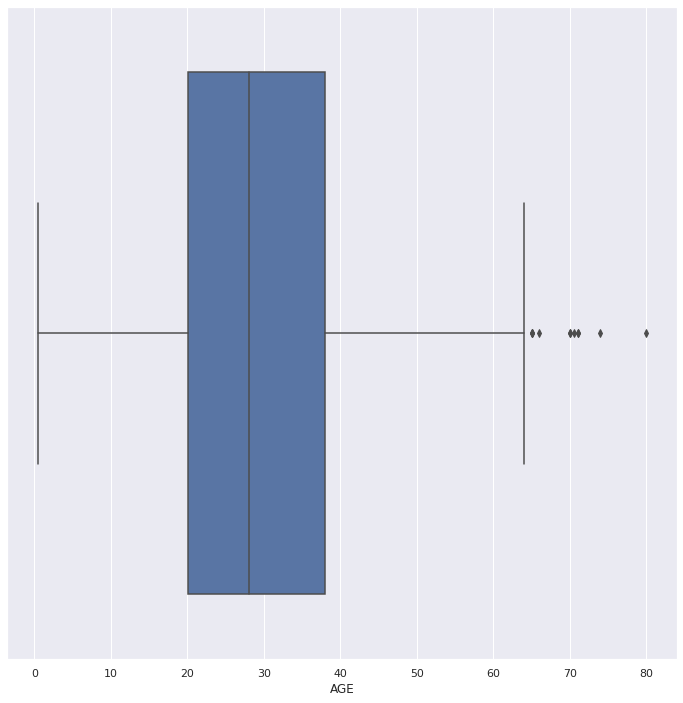

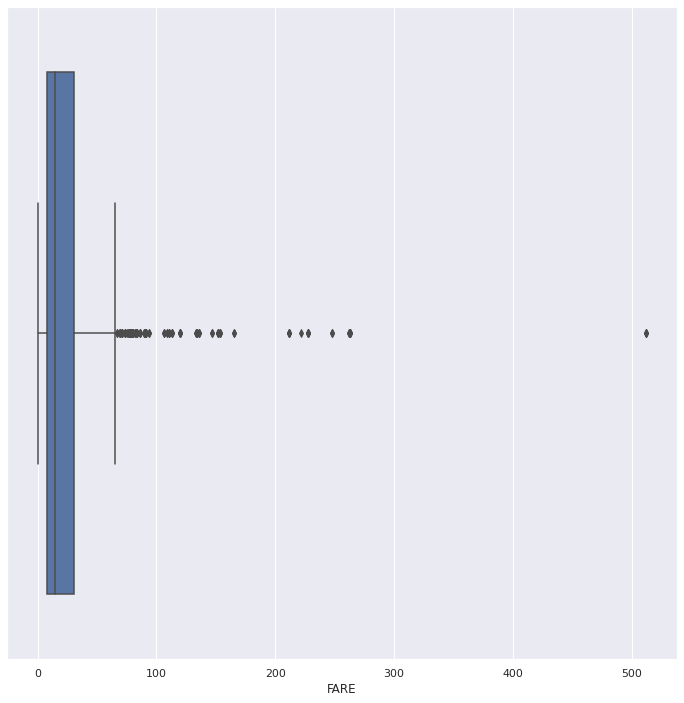

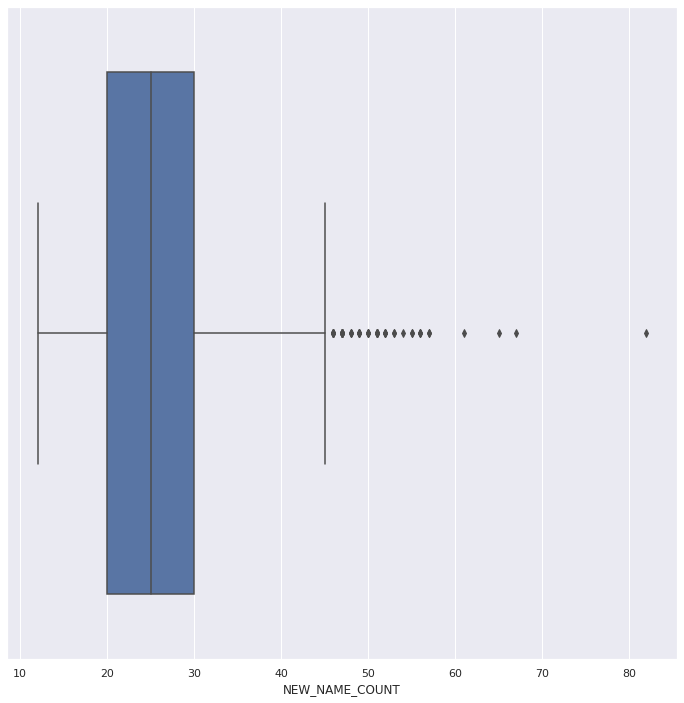

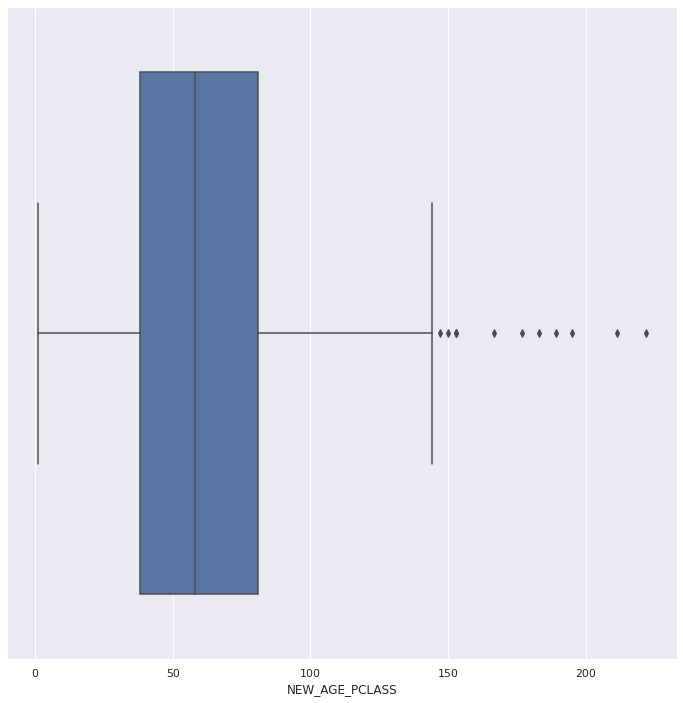

In [1081]:
for col in num_cols:
  sns.boxplot(x=df[col])
  plt.show(block=True)

* Görüldüğü üzere iki sayısal değişken için de incelediğimizde şuan aykırı değerler var.
* Aykırı değerlerin eşik değerlerini hesaplayan bir fonksiyon yazalım.


In [1082]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [1083]:
for col in num_cols:
  print(col, outlier_thresholds(df, col))

AGE (-6.6875, 64.8125)
FARE (-26.724, 65.6344)
NEW_NAME_COUNT (5.0, 45.0)
NEW_AGE_PCLASS (-26.5, 145.5)


Veri setimiz de aykırı değer var mı sorusuna cavp arayalım.

In [1084]:
def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [1085]:
for col in num_cols:
  print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


* Dört değişkende de aykırı olduğunu göstermekte.
* Aykırı değere sahip gözlemleri erişmek için bir fonksiyon yazalım.

In [1086]:
def grab_outliers(dataframe, col_name, index=False):
  low, up = outlier_thresholds(dataframe, col_name)

  if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
  else:
    print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])
  
  if index:
    outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
    return outlier_index

Yaş değişkeni için aykırı gözlemler ve index bilgileri.

In [1087]:
grab_outliers(df, "AGE", index=True)

     SURVIVED  PCLASS                            NAME   SEX    AGE  SIBSP  PARCH      TICKET   FARE CABIN EMBARKED  NEW_CABIN_FLAG NEW_IS_ALONE  NEW_NAME_COUNT  NEW_NAME_WORD_COUNT  NEW_NAME_DR NEW_TITLE  NEW_AGE_PCLASS  NEW_FAMILY_SIZE NEW_AGE_CAT NEW_SEX_CAT
33          0       2           Wheadon, Mr. Edward H  male 66.000      0      0  C.A. 24579 10.500   NaN        S               0          YES              21                    4            0        Mr         132.000                1      senior  seniormale
54          0       1  Ostby, Mr. Engelhart Cornelius  male 65.000      0      1      113509 61.979   B30        C               1           NO              30                    4            0        Mr          65.000                2      senior  seniormale
96          0       1       Goldschmidt, Mr. George B  male 71.000      0      0    PC 17754 34.654    A5        C               1          YES              25                    4            0        Mr          71.0

Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64')

Fare değişkeni için aykırı olan gözlemler ve index bilgileri.

In [1088]:
grab_outliers(df, "FARE", index=True)

    SURVIVED  PCLASS                                               NAME     SEX    AGE  SIBSP  PARCH    TICKET    FARE        CABIN EMBARKED  NEW_CABIN_FLAG NEW_IS_ALONE  NEW_NAME_COUNT  NEW_NAME_WORD_COUNT  NEW_NAME_DR NEW_TITLE  NEW_AGE_PCLASS  NEW_FAMILY_SIZE NEW_AGE_CAT   NEW_SEX_CAT
1          1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0  PC 17599  71.283          C85        C               1           NO              51                    7            0       Mrs          38.000                2      mature  maturefemale
27         0       1                     Fortune, Mr. Charles Alexander    male 19.000      3      2     19950 263.000  C23 C25 C27        S               1           NO              30                    4            0        Mr          19.000                6      mature     youngmale
31         1       1     Spencer, Mrs. William Augustus (Marie Eugenie)  female    NaN      1      0  PC 17569 146.521          B78  

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879], dtype='int64', length=116)

NEW_NAME_COUNT değişkeni için aykırı olan gözlemler ve index bilgileri.

In [1089]:
grab_outliers(df, "NEW_NAME_COUNT", index=True)

    SURVIVED  PCLASS                                               NAME     SEX    AGE  SIBSP  PARCH    TICKET    FARE CABIN EMBARKED  NEW_CABIN_FLAG NEW_IS_ALONE  NEW_NAME_COUNT  NEW_NAME_WORD_COUNT  NEW_NAME_DR NEW_TITLE  NEW_AGE_PCLASS  NEW_FAMILY_SIZE NEW_AGE_CAT   NEW_SEX_CAT
1          1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0  PC 17599  71.283   C85        C               1           NO              51                    7            0       Mrs          38.000                2      mature  maturefemale
8          1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female 27.000      0      2    347742  11.133   NaN        S               0           NO              49                    7            0       Mrs          81.000                3      mature  maturefemale
18         0       3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female 31.000      1      0    345763  18.000   NaN        S               0     

Int64Index([1, 8, 18, 25, 31, 40, 41, 53, 85, 132, 142, 161, 165, 167, 186, 192, 299, 307, 319, 323, 328, 334, 366, 383, 394, 416, 423, 427, 431, 432, 486, 498, 513, 518, 523, 556, 581, 591, 600, 608, 610, 617, 669, 670, 700, 705, 709, 710, 759, 779, 799, 809, 820, 862, 871], dtype='int64')

NEW_AGE_PCLASS değişkeni için aykırı olan gözlemler ve index bilgileri.

In [1090]:
grab_outliers(df, "NEW_AGE_PCLASS", index=True)

     SURVIVED  PCLASS                     NAME   SEX    AGE  SIBSP  PARCH      TICKET  FARE CABIN EMBARKED  NEW_CABIN_FLAG NEW_IS_ALONE  NEW_NAME_COUNT  NEW_NAME_WORD_COUNT  NEW_NAME_DR NEW_TITLE  NEW_AGE_PCLASS  NEW_FAMILY_SIZE NEW_AGE_CAT NEW_SEX_CAT
94          0       3        Coxon, Mr. Daniel  male 59.000      0      0      364500 7.250   NaN        S               0          YES              17                    3            0        Mr         177.000                1      senior  seniormale
116         0       3     Connors, Mr. Patrick  male 70.500      0      0      370369 7.750   NaN        Q               0          YES              20                    3            0        Mr         211.500                1      senior  seniormale
152         0       3         Meo, Mr. Alfonzo  male 55.500      0      0  A.5. 11206 8.050   NaN        S               0          YES              16                    3            0        Mr         166.500                1      mature 

Int64Index([94, 116, 152, 222, 280, 326, 406, 482, 483, 597, 631, 851], dtype='int64')

**Aykırı değer problemini baskılama yöntemini ile çözelim.**

Aykırı değerleri alt sınırın altındaki değerlere alt sınır, üst sınırın üstünde kalan değerlere ise üst sınır değerleri ile değiştirebileceğimiz bir fonksiyon yazalım.

In [1091]:
def replace_with_threasholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Aykırı değere sahip tüm sayısal değişkenler için aykırı değerleri eşik değerleri ile baskılayalım.

In [1092]:
for col in num_cols:
  replace_with_threasholds(df, col)

* Aykırı değer problemimiz çözüldü.
* Tekrardan aykırı değer sorgusu yapalım.

In [1093]:
for col in num_cols:
  print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


Görüldüğü üzere artık aykırı değerimiz kalmadı.

## **Eksik Değerler (Missing Values)**

* Öncelikle CABIN değişkeni tek başına bir bilgi taşımıyor o yüzden bu değişkeni silelim.
* Feature Engineering bölümünde zaten bu değişkenden yeni değişken türetmiştir.
* Ayrıca Ticket ve NAME değişkenlerini de silelim.
* Çünkü NAME değişkeni kardinalitesi yüksek bir değişken ve TICKET değişkeni de bilgi taşımamakta.


In [1094]:
df.drop("CABIN", inplace=True,  axis=1)

In [1095]:
remove_cols = ["TICKET", "NAME"]

In [1096]:
df.drop(remove_cols, inplace=True, axis=1)

Değişkenler de eksik değer var mı bununn sorgusunu yapıp ardından eksik değerleri dolduralım.

Değişken bazında eksik değer sorgusu yapalım.

In [1097]:
df.isnull().sum()

SURVIVED                 0
PCLASS                   0
SEX                      0
AGE                    177
SIBSP                    0
PARCH                    0
FARE                     0
EMBARKED                 2
NEW_CABIN_FLAG           0
NEW_IS_ALONE             0
NEW_NAME_COUNT           0
NEW_NAME_WORD_COUNT      0
NEW_NAME_DR              0
NEW_TITLE                0
NEW_AGE_PCLASS         177
NEW_FAMILY_SIZE          0
NEW_AGE_CAT            203
NEW_SEX_CAT            177
dtype: int64

Toplam da beş tane eksik değer bulunmakta.
* Bu eksik değerler için bir fonksiyon yazalım.
* Bize eksik değerlerin veri seti boyutuna oranını ve eksik değre sahip değişkenleri getirsin.

In [1098]:
def missing_values_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df, end="\n")

  if na_name:
    return na_columns

In [1099]:
missing_values_table(df, na_name=True)

                n_miss  ratio
NEW_AGE_CAT        203 22.780
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


['AGE', 'EMBARKED', 'NEW_AGE_PCLASS', 'NEW_AGE_CAT', 'NEW_SEX_CAT']

Yaş değişkenini yaş değişkenin eksik değerleri yeni oluşturduğumuz NEW_TITLE kırılımında median değerlerini o title'a bağlı eksik yaş değerlerine atayalım.

In [1100]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [1101]:
missing_values_table(df, na_name=True)

                n_miss  ratio
NEW_AGE_CAT        203 22.780
NEW_AGE_PCLASS     177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


['EMBARKED', 'NEW_AGE_PCLASS', 'NEW_AGE_CAT', 'NEW_SEX_CAT']

* Yaş değişkenindeki eksik değerler gitti ama yaş değişkeninden oluşturduğumuz yeni değişkenlerin eksik değerleri gitmedi.
* O değişkenleri tekrardan oluşturmalıyız.

In [1102]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

In [1103]:
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

In [1104]:
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

Tekrardan eksik değer kontrolü yapalım.

In [1105]:
missing_values_table(df, na_name=True)

          n_miss  ratio
EMBARKED       2  0.220


['EMBARKED']

* EMBARKED değişkeni hariç diğer değişkenlerin eksik değerli doldurulmuş oldu.
* EMBARKED değişkenine de o değişkeni mode'u ile (en çok tekrar eden değeri) dolduralım.
* Genellenebilirlik kaygısından dolayı kategorik tipteki tüm değişkenlerin için mode'u ile doldurmaya çalıştık.
* Yani EMBARKED değişkeni haricinde eksik değere sahip kategorik değişken olmuş olsaydı onları da mode'u ile doldurmuş olacaktık.

In [1106]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

Son olarak tekrardan eksik değerler ile dolduralım.

In [1107]:
missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

Artık eksik değerimiz yok.

## **Encoding**

**Label Encoding**

Eşsiz sınıf değeri iki olup category ve object tipteki değişkenleri dönüştürelim.

In [1108]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [1109]:
binary_cols

['SEX', 'NEW_IS_ALONE']

In [1110]:
def label_encoder(dataframe, binary_col): #binary_col: Yani iki sınıflı bir değişken girmemiz gerekiyor.
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [1111]:
for col in binary_cols:
  df = label_encoder(df, col)

In [1112]:
df.head()

,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_AGE_CAT,NEW_SEX_CAT
0,0,3,1,22.000,1,0,7.250,S,0,0,23,4,0,Mr,66.000,2,mature,maturemale
1,1,1,0,38.000,1,0,65.634,C,1,0,45,7,0,Mrs,38.000,2,mature,maturefemale
2,1,3,0,26.000,0,0,7.925,S,0,1,22,3,0,Miss,78.000,1,mature,maturefemale
3,1,1,0,35.000,1,0,53.100,S,1,0,44,7,0,Mrs,35.000,2,mature,maturefemale
4,0,3,1,35.000,0,0,8.050,S,0,1,24,4,0,Mr,105.000,1,mature,maturemale


**Rare Encoding**

In [1113]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts())) #İlgili kategorik değişkenin kaç sınıfı var bilgisi.
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(), #Sınıf frekansı
                            "RATIO": dataframe[col].value_counts() / len(dataframe), #Sınıfın tüm ver seti boyutuna oranı.
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n") #Bağımlı değişkene göre groupby alınıp ortalama işlemi yapılması.

In [1114]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


NEW_TITLE : 17
          COUNT  RATIO  TARGET_MEAN
Capt          1  0.001        0.000
Col           2  0.002        0.500
Countess      1  0.001        1.000
Don           1  0.001        0.000
Dr            7  0.008        0.429
Jonkheer      1  0.001        0.000
Lady          1  0.001        1.000
Major         2  0.002        0.500
Master       40  0.045        0.575
Miss        182  0.204        0.698
Mlle          2  0.002        1.000
Mme           1  0.001        1.000
Mr          517  0.580        0.157
Mrs         125  0.140        0.792
Ms            1  0.001        1.000
Rev           6  0.007        0.000
Sir           1  0.001        1.000


N

* Sınıflarının frekansları tüm veri setine oranı %1'in altında olanları RARE bir sınıf altında toplamak istedik.
* Çün One Hot Encoding işlemi yapınca her sınıf için değişken oluşturacak ve içerisinde saedece bir tane değer olup diğerlerinin hepsi sıfır olması gereksiz bir değişken oluşturduğumuz anlamına gelir.
* Gereksiz değişkenlerde iterasyon ve optimizasyon sürelerini olumsuz etkiliyor olacaktır.

In [1115]:
def rare_encoder(dataframe, rare_perc):
  temp_df = dataframe.copy() #Fonksiyonun bir kopyası alınmış.

  rare_columns = [col for col in df.columns if temp_df[col].dtypes == "O" 
                  and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]


  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_perc].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])

  return temp_df

In [1116]:
df = rare_encoder(df, 0.01)

In [1117]:
df.head()

,SURVIVED,PCLASS,SEX,AGE,SIBSP,PARCH,FARE,EMBARKED,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_AGE_PCLASS,NEW_FAMILY_SIZE,NEW_AGE_CAT,NEW_SEX_CAT
0,0,3,1,22.000,1,0,7.250,S,0,0,23,4,0,Mr,66.000,2,mature,maturemale
1,1,1,0,38.000,1,0,65.634,C,1,0,45,7,0,Mrs,38.000,2,mature,maturefemale
2,1,3,0,26.000,0,0,7.925,S,0,1,22,3,0,Miss,78.000,1,mature,maturefemale
3,1,1,0,35.000,1,0,53.100,S,1,0,44,7,0,Mrs,35.000,2,mature,maturefemale
4,0,3,1,35.000,0,0,8.050,S,0,1,24,4,0,Mr,105.000,1,mature,maturemale


Rare oranı 0.01'in altında kalan kategorik değişkenlerin sınıflarını bir araya getirdik.

In [1118]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT  RATIO  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


EMBARKED : 3
   COUNT  RATIO  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


NEW_IS_ALONE : 2
   COUNT  RATIO  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


NEW_TITLE : 5
        COUNT  RATIO  TARGET_MEAN
Master     40  0.045        0.575
Miss      182  0.204        0.698
Mr        517  0.580        0.157
Mrs       125  0.140        0.792
Rare       27  0.030        0.444


NEW_AGE_CAT : 3
        COUNT  RATIO  TARGET_MEAN
mature    735  0.825        0.363
senior     39  0.044        0.308
young     117  0.131        0.538


NEW_SEX_CAT : 6
              COUNT  RATIO  TARGET_MEAN
maturefemale    172  0.193        0.779
maturemale      401  0.450        0.175
seniorfemale     22  0.025        0.909
seniormale       52  0.058        0.135
youngfemale     120  0.135        0.658
youngmale       124  0.139        0.

Rare encoding işleminin sonucu görmek 

In [1119]:
df["NEW_TITLE"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

**One Hot Encoding**

* Eşsiz sınıf değeri 2 olanları zaten label encoder'dan geçirdik.
* O yüzden One Hot Encoder'dan eşsiz sınıf değeri 10'dan küçük 2'den büyük olanları geçirelim.

In [1120]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [1121]:
ohe_cols

['PCLASS',
 'SIBSP',
 'PARCH',
 'EMBARKED',
 'NEW_NAME_WORD_COUNT',
 'NEW_TITLE',
 'NEW_FAMILY_SIZE',
 'NEW_AGE_CAT',
 'NEW_SEX_CAT']

In [1122]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
  dataframe = pd.get_dummies(df, columns=categorical_cols, drop_first = drop_first)
  return dataframe

In [1123]:
df = one_hot_encoder(df, ohe_cols)

In [1124]:
df.head()

,SURVIVED,SEX,AGE,FARE,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,0,1,22.000,7.250,0,0,23,0,66.000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,38.000,65.634,1,0,45,0,38.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,26.000,7.925,0,1,22,0,78.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,35.000,53.100,1,0,44,0,35.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,35.000,8.050,0,1,24,0,105.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Tekrardan değişkenlerimizi tiplerine göre ayıralım.

In [1125]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 891
Variables (Değişken Sayısı): 51
cat_cols (Kategorik Değişkenler): 5
num_cols (Sayısal Değişkenler): 4
cat_but_car (Kardinalitesi Yüksek Değişkenler): 0
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 5


## **Scaling**

Standart Scaler ile ölçekledirme yapalım.
* Ölçeklendirme yapmamızın sebebi sayısal değişkenleri dağılımını bozmadan bir arada değerlendirme imkanı sağlar.

In [1126]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obsertavions - (Gözlem Sayısı): 891
Variables (Değişken Sayısı): 51
cat_cols (Kategorik Değişkenler): 5
num_cols (Sayısal Değişkenler): 4
cat_but_car (Kardinalitesi Yüksek Değişkenler): 0
num_but_cat (Sayısal Görünümlü Kategorik Değişkenler): 5


In [1127]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [1128]:
scaler = StandardScaler()

In [1129]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [1130]:
df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.561,-0.821,-0.437,0.066
1,0.663,2.032,2.248,-0.790
2,-0.255,-0.788,-0.559,0.434
3,0.434,1.419,2.126,-0.882
4,0.434,-0.781,-0.315,1.260


In [1131]:
df.head()

,SURVIVED,SEX,AGE,FARE,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,0,1,-0.561,-0.821,0,0,-0.437,0,0.066,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0.663,2.032,1,0,2.248,0,-0.790,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,-0.255,-0.788,0,1,-0.559,0,0.434,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0.434,1.419,1,0,2.126,0,-0.882,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0.434,-0.781,0,1,-0.315,0,1.260,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


* Artık Feature Engineering ve Data Pre-Processing işlemlerinin sonuna geldik.
* Modelleme basamağına geçebiliriz.

In [1132]:
df.shape

(891, 51)

12 değişken ile başlamıştık şuan 51 değişken oldu.

# **3.Step: Modelling**

* Öncelikle veri setimizi Holdout yöntemiyle özellikler ve hedef değişken olarak ikiye bölelim.
* Ardından eğitim ve test verisi olarak ikiye bölelim.

In [1133]:
y = df["SURVIVED"]

In [1134]:
X = df.drop(["SURVIVED"], axis=1)

In [1135]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: SURVIVED, dtype: int64

In [1136]:
X.head()

,SEX,AGE,FARE,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,-0.561,-0.821,0,0,-0.437,0,0.066,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0.663,2.032,1,0,2.248,0,-0.790,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,-0.255,-0.788,0,1,-0.559,0,0.434,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.434,1.419,1,0,2.126,0,-0.882,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.434,-0.781,0,1,-0.315,0,1.260,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

* Eğitim setiyle model kuracağız test setiyle modelin başarısını ölçeceğiz.

In [1138]:
X_train.head()

,SEX,AGE,FARE,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
66,0,-0.025,-0.662,1,1,0.174,0,-0.178,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
381,0,-2.167,-0.406,0,0,0.052,0,-1.862,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
223,1,0.051,-0.789,0,1,-0.803,0,0.801,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
629,1,0.051,-0.797,0,1,-0.315,0,0.801,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
337,0,0.893,2.032,1,1,0.540,0,-0.699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1139]:
X_test.head()

,SEX,AGE,FARE,NEW_CABIN_FLAG,NEW_IS_ALONE,NEW_NAME_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
890,1,0.204,-0.796,0,1,-0.925,0,0.985,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
498,0,-0.331,2.032,1,0,2.248,0,-1.188,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
664,1,-0.714,-0.788,0,0,0.052,0,-0.117,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
261,1,-2.014,0.359,0,0,0.784,0,-1.678,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
716,0,0.663,2.032,1,1,0.296,0,-0.790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1140]:
y_train[:5]

66     1
381    1
223    0
629    0
337    1
Name: SURVIVED, dtype: int64

In [1141]:
y_test[:5]

890    0
498    0
664    1
261    1
716    1
Name: SURVIVED, dtype: int64

## **Random Forest**

**Model**

In [1142]:
rf_model = RandomForestClassifier(random_state=42)

In [1143]:
rf_model = rf_model.fit(X_train, y_train)

**Tahmin**

In [1144]:
y_pred = rf_model.predict(X_test)

In [1145]:
y_pred[0:5]

array([0, 1, 0, 0, 1])

**Başarı Testi**

In [1146]:
accuracy_score(y_pred, y_test)

0.8208955223880597

## **KNN**

**Model**

In [1147]:
knn_model = KNeighborsClassifier()

In [1148]:
knn_model = knn_model.fit(X_train, y_train)

**Tahmin**

In [1149]:
y_pred = knn_model.predict(X_test)

In [1150]:
y_pred[0:5]

array([0, 1, 0, 0, 1])

**Başarı Testi**

In [1151]:
accuracy_score(y_pred, y_test)

0.7947761194029851

## **XGBoost**

**Model**

In [1152]:
xgb_model = XGBClassifier(random_state=42)

In [1153]:
xgb_model = xgb_model.fit(X_train, y_train)

**Tahmin**

In [1154]:
y_pred = xgb_model.predict(X_test)

In [1155]:
y_pred[0:5]

array([0, 1, 0, 0, 1])

**Başarı Testi**

In [1156]:
accuracy_score(y_pred, y_test)

0.7761194029850746

## **LightGBM**

**Model**

In [1157]:
gbm_model = GradientBoostingClassifier(random_state=42)

In [1158]:
gbm_model = gbm_model.fit(X_train, y_train)

**Tahmin**

In [1159]:
y_pred = xgb_model.predict(X_test)

In [1160]:
y_pred[0:5]

array([0, 1, 0, 0, 1])

**Başarı Testi**

In [1161]:
accuracy_score(y_pred, y_test)

0.7761194029850746

## **Destek Vektör Makinesi**

**Model**

In [1162]:
svm_model = SVC(random_state = 42)

In [1163]:
svm_model = svm_model.fit(X_train, y_train)

**Tahmin**

In [1164]:
y_pred = svm_model.predict(X_test)

In [1165]:
y_pred[0:5]

array([0, 1, 0, 0, 1])

**Başarı Testi**

In [1166]:
accuracy_score(y_pred, y_test)

0.7910447761194029

## **Logistic Regresyon**

**Model**

In [1167]:
lr_model = LogisticRegression(random_state=42)

In [1168]:
lr_model = lr_model.fit(X_train, y_train)

**Tahmin**

In [1169]:
y_pred = lr_model.predict(X_test)

In [1170]:
y_pred[0:5]

array([0, 1, 0, 0, 1])

**Başarı Testi**

In [1171]:
accuracy_score(y_pred, y_test)

0.7985074626865671

## **Decision Tree**

**Model**

In [1172]:
dt_model = DecisionTreeClassifier(random_state=42)

In [1173]:
dt_model = dt_model.fit(X_train, y_train)

**Tahmin**

In [1174]:
y_pred = dt_model.predict(X_test)

In [1175]:
y_pred[0:5]

array([0, 0, 0, 0, 1])

**Başarı Testi**

In [1176]:
accuracy_score(y_pred, y_test)

0.7425373134328358

# **Result**

0.82 başarı ile Random Forest algoritması en iyi sonucu vermiştir.